<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/10_4_%EC%84%B8%EC%85%98_%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [3]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [4]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [5]:
from sklearn.metrics import precision_score

precision_score(y,y_pred)

0.900990099009901

* 재현율

In [7]:
from sklearn.metrics import recall_score

recall_score(y,y_pred)

0.8584905660377359

* F1 score

In [6]:
from sklearn.metrics import f1_score

f1_score(y,y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [9]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba0 = pred_proba[:,1]

binarizer = Binarizer(threshold = 0.1) # threshold 지정
y_pred2 = binarizer.fit_transform(pred_proba0.reshape(-1,1)) # binarizer는 2-d array 값을 받음.

* ROC 곡선 시각화

In [10]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

def get_eval_score(y,y_pred2):
  confusion = confusion_matrix(y,y_pred2)
  accuracy = accuracy_score(y,y_pred2)
  precision = precision_score(y,y_pred2)
  recall = recall_score(y,y_pred2)
  f1 = f1_score(y,y_pred2)
  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1 : {3:.4f}'.format(accuracy,precision,recall,f1))

get_eval_score(y,y_pred2)

오차행렬
[[267  90]
 [  6 206]]
정확도 : 0.8313, 정밀도 : 0.6959, 재현율 : 0.9717, f1 : 0.8110


In [14]:
from sklearn.metrics import roc_curve
pred_proba_class1 = model_lor.predict_proba(X)[:,1]
fprs, tprs, thresholds = roc_curve(y,pred_proba_class1)

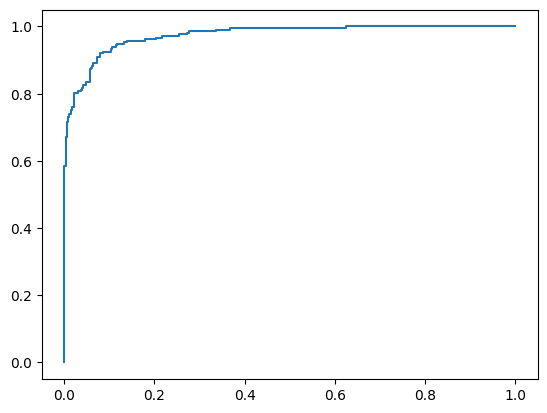

In [12]:
import matplotlib.pyplot as plt
plt.plot(fprs,tprs)
plt.show()

* ROC AUC 값

In [15]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y,pred_proba_class1)
roc_score

0.97412927435125